___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
bikes = pd.read_csv('store_sharing.csv', encoding="windows-1252")

In [3]:
bikes.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
bikes.duplicated().value_counts()

False    17414
dtype: int64

In [5]:
bikes.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [6]:
bikes.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

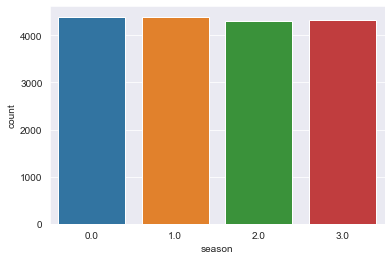

In [7]:
# season

season = sns.countplot(x="season", data=bikes)

In [8]:
bikes['is_holiday'].value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

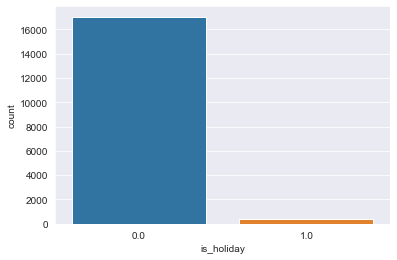

In [9]:
# is_holiday

holiday = sns.countplot(x='is_holiday', data=bikes)

In [10]:
bikes['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

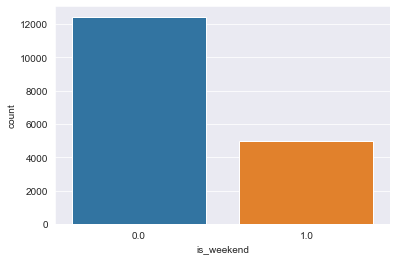

In [11]:
# is_weekend

weekend = sns.countplot(x='is_weekend', data=bikes)

In [12]:
bikes['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

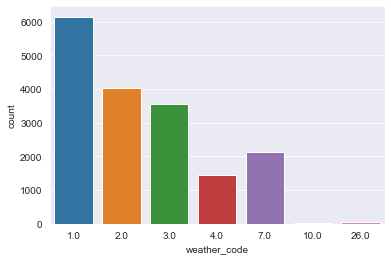

In [13]:
# weather_code

weather_code = sns.countplot(x='weather_code', data=bikes)

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [14]:
bikes["timestamp"] = pd.to_datetime(bikes["timestamp"])

In [15]:
bikes = bikes.set_index("timestamp")

In [16]:
bikes.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [17]:
bikes['year_month'] = bikes.index.strftime('%Y-%m')
bikes['year'] = bikes.index.year
bikes['month'] = bikes.index.month
bikes['day_of_month'] = bikes.index.day
bikes['day_of_week'] = bikes.index.weekday
bikes['hour'] = bikes.index.hour

In [19]:
bikes.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

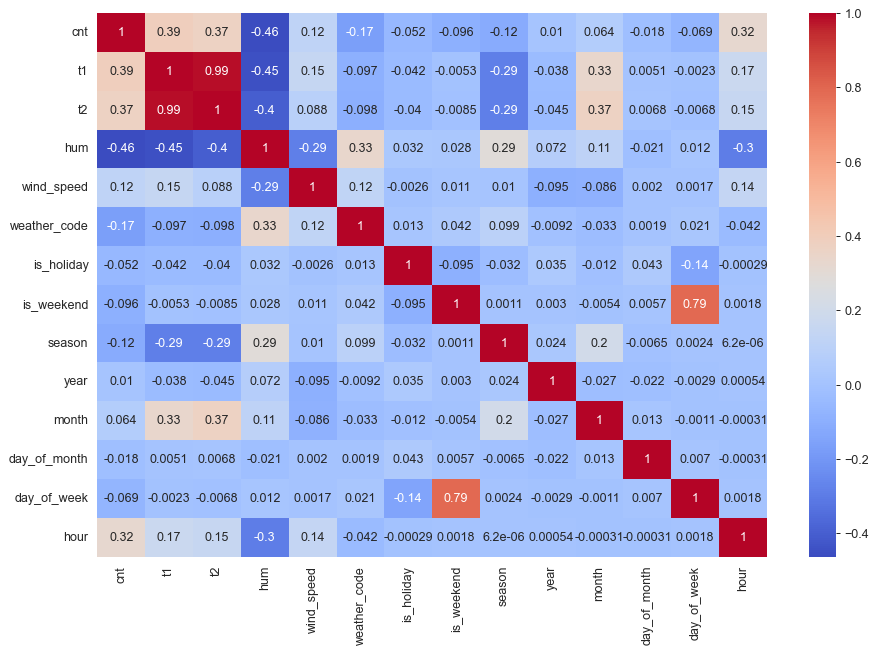

In [30]:
# for all variables 

plt.figure(figsize=(12,8), dpi=90)
heatmap_bikes = sns.heatmap(bikes.corr(), annot=True, cmap='coolwarm')

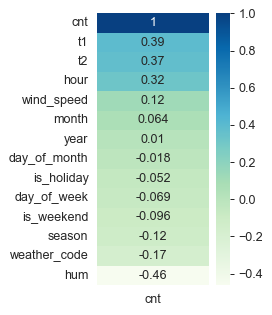

In [40]:
# for the target variable

plt.figure(figsize=(2,4), dpi=90)
heatmap_cnt = sns.heatmap(bikes.corr()[['cnt']].sort_values(by='cnt', ascending=False), annot=True, cmap='GnBu' )

### 8. Visualize the correlation of the target variable and the other features with barplot

<Figure size 1800x1200 with 0 Axes>

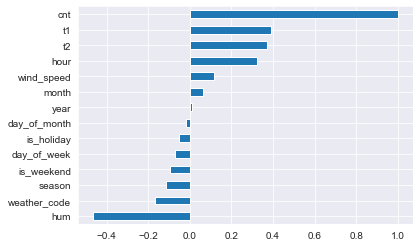

In [42]:
#with pandas

plt.figure(figsize=(12, 8), dpi=150)
barplot_cnt = bikes.corr()[["cnt"]].sort_values(by="cnt").plot.barh(legend=False)

### 9.Plot bike shares over time use lineplot

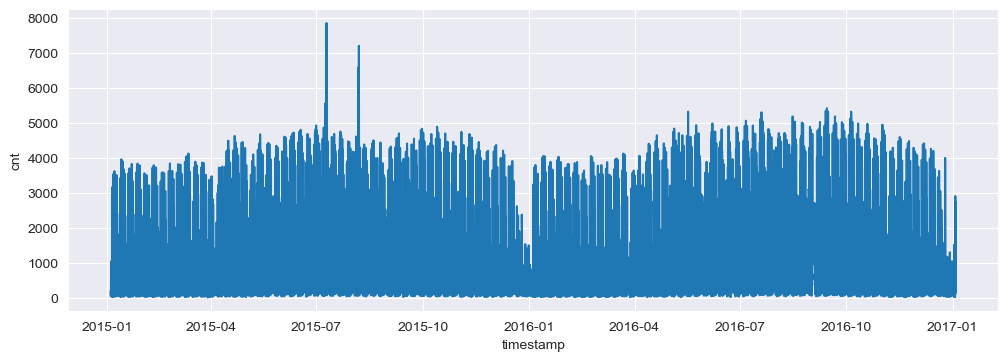

In [43]:
plt.figure(figsize=(12,4), dpi=100)
lineplot_cnt = sns.lineplot(x=bikes.index,y="cnt", data=bikes)

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [44]:
year_month = bikes.groupby("year_month").sum().reset_index()

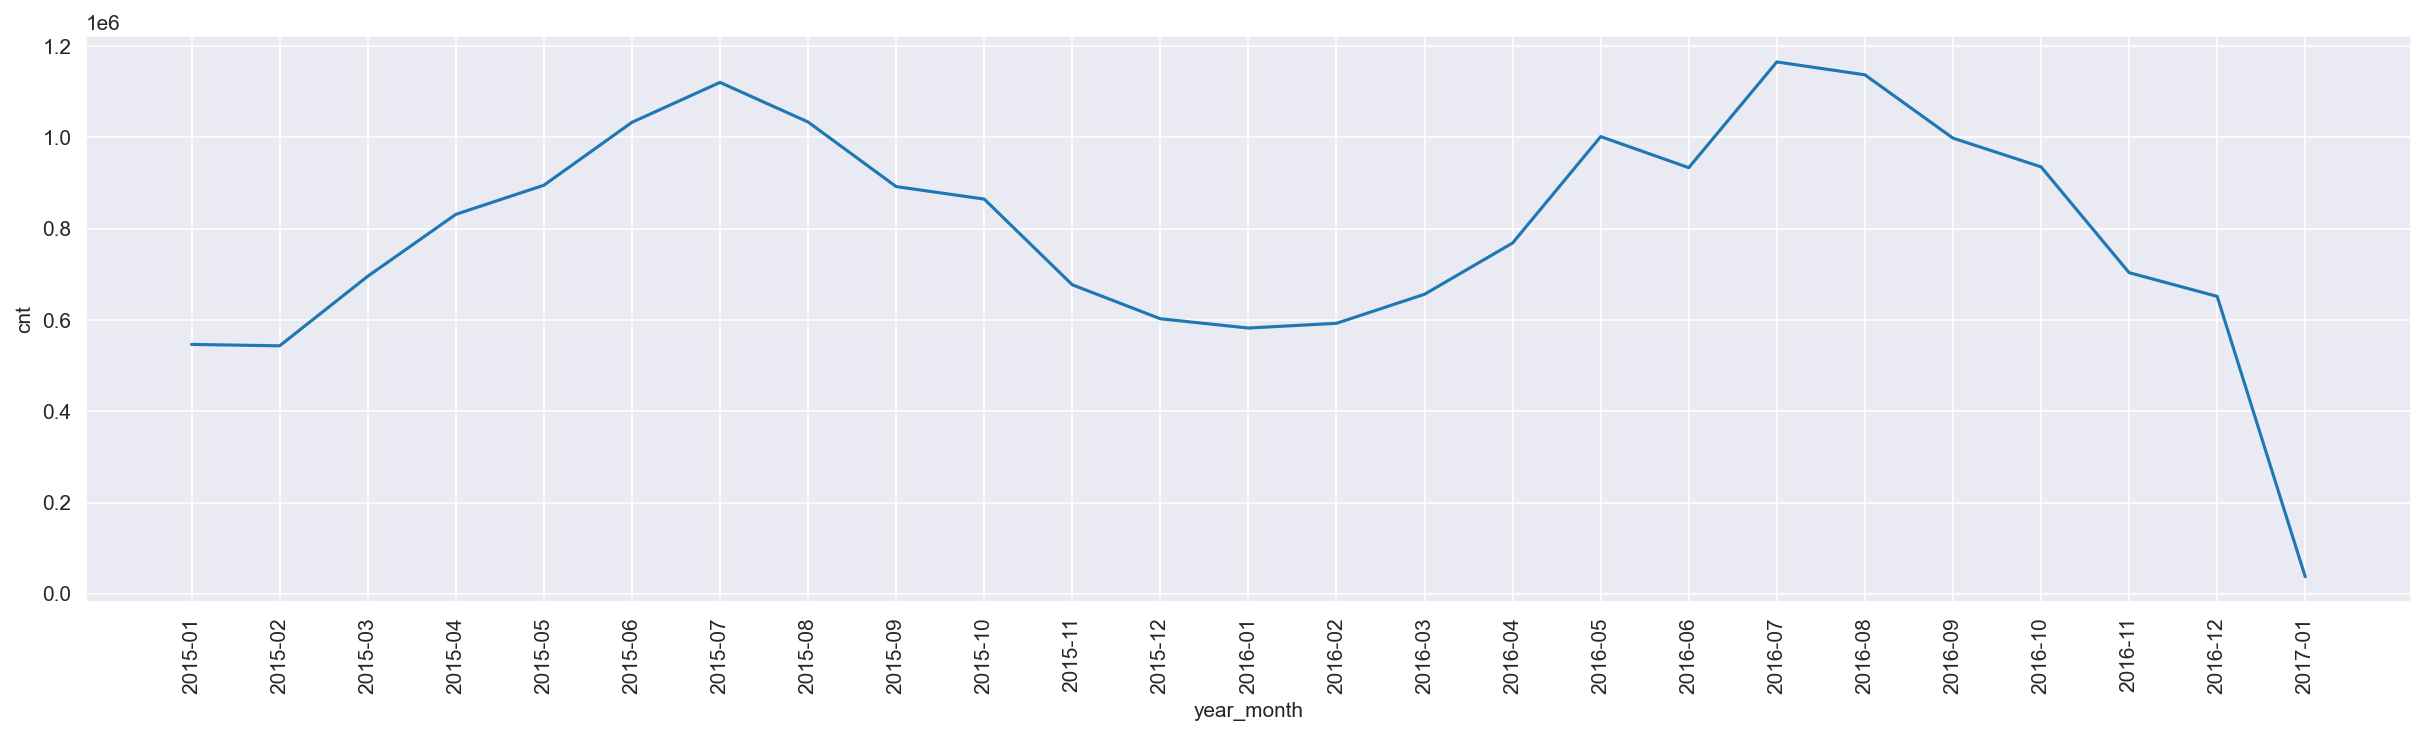

In [46]:
# with lineplot

plt.figure(figsize=(20,5), dpi=150)
sns.lineplot(x="year_month", y="cnt", data=year_month)
plt.xticks(rotation=90);

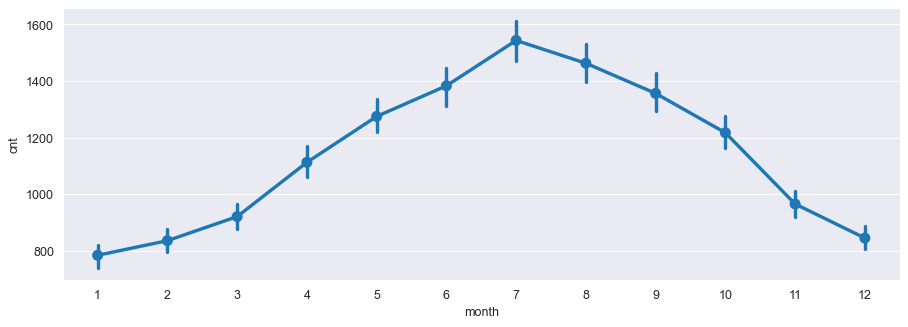

In [52]:
# with pointplot

plt.figure(figsize=(12,4), dpi=90)
sns.pointplot(x="month", y="cnt", data=bikes);

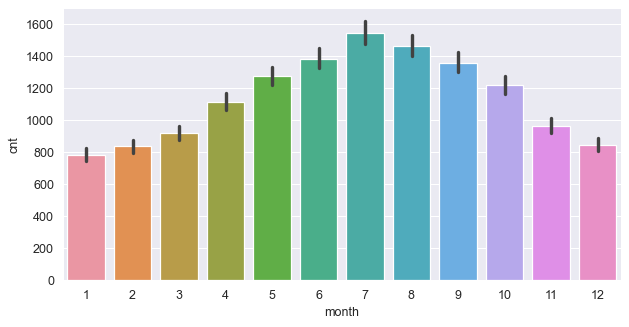

In [55]:
# with barplot

plt.figure(figsize=(8,4), dpi=90)
sns.barplot(x="month", y="cnt", data=bikes);

### 11.Plot bike shares by hours on (holidays, weekend, season)

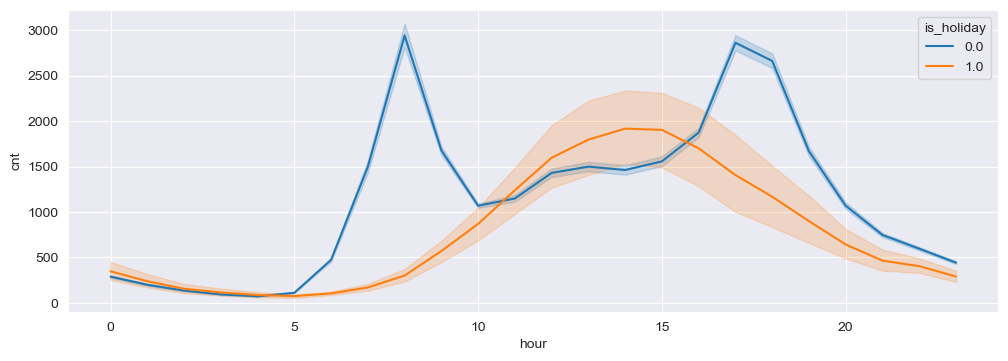

In [57]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(12,4), dpi=100)
lineplot_is_holiday = sns.lineplot(data=bikes, x="hour", y="cnt", hue="is_holiday")

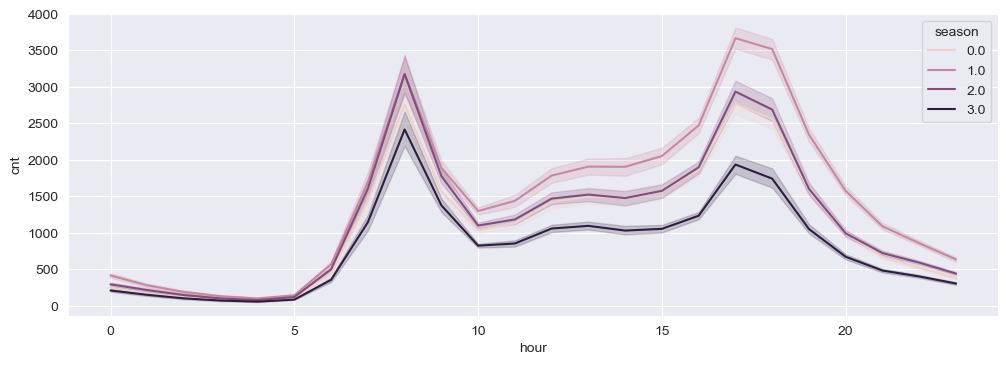

In [58]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(12,4), dpi=100)
lineplot_seasonal = sns.lineplot(data=bikes, x="hour", y="cnt", hue="season")

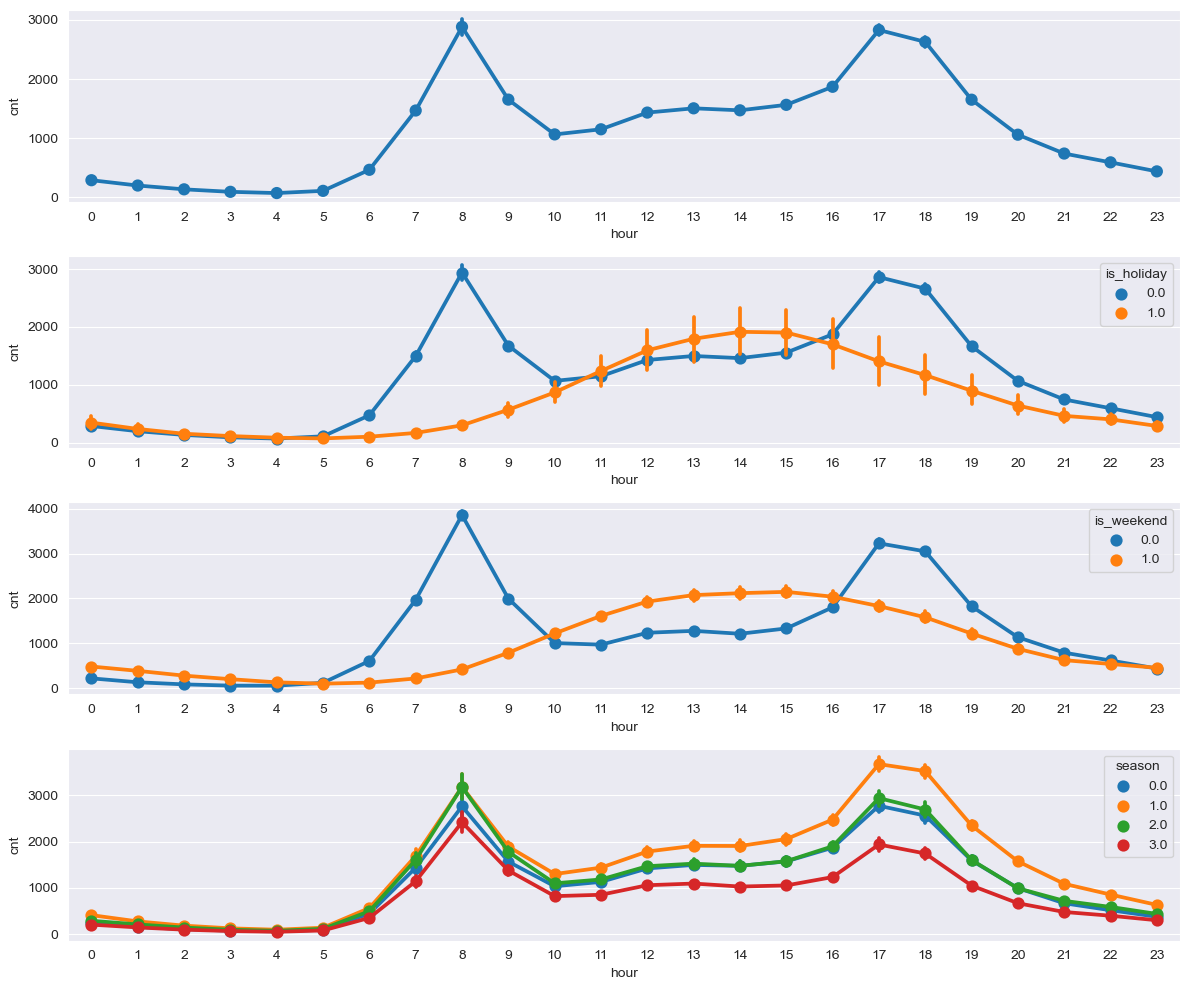

In [59]:
# with pointplot

fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=bikes, x="hour", y="cnt", ax=axs[0])
sns.pointplot(data=bikes, x="hour", y="cnt", ax=axs[1], hue="is_holiday")
sns.pointplot(data=bikes, x="hour", y="cnt", ax=axs[2], hue="is_weekend")
sns.pointplot(data=bikes, x="hour", y="cnt", ax=axs[3], hue="season")
plt.tight_layout()

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

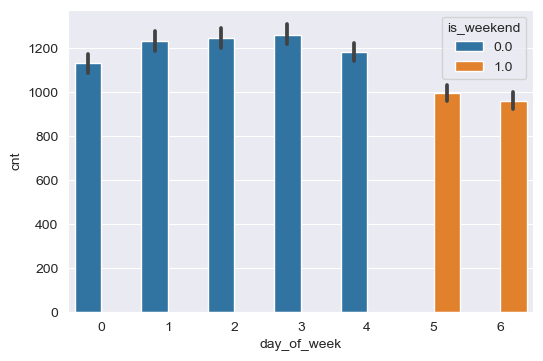

In [60]:
# with barplot

plt.figure(figsize=(6,4), dpi=100)
barplot_daysofweeks = sns.barplot(x="day_of_week", y="cnt", data=bikes, hue="is_weekend")

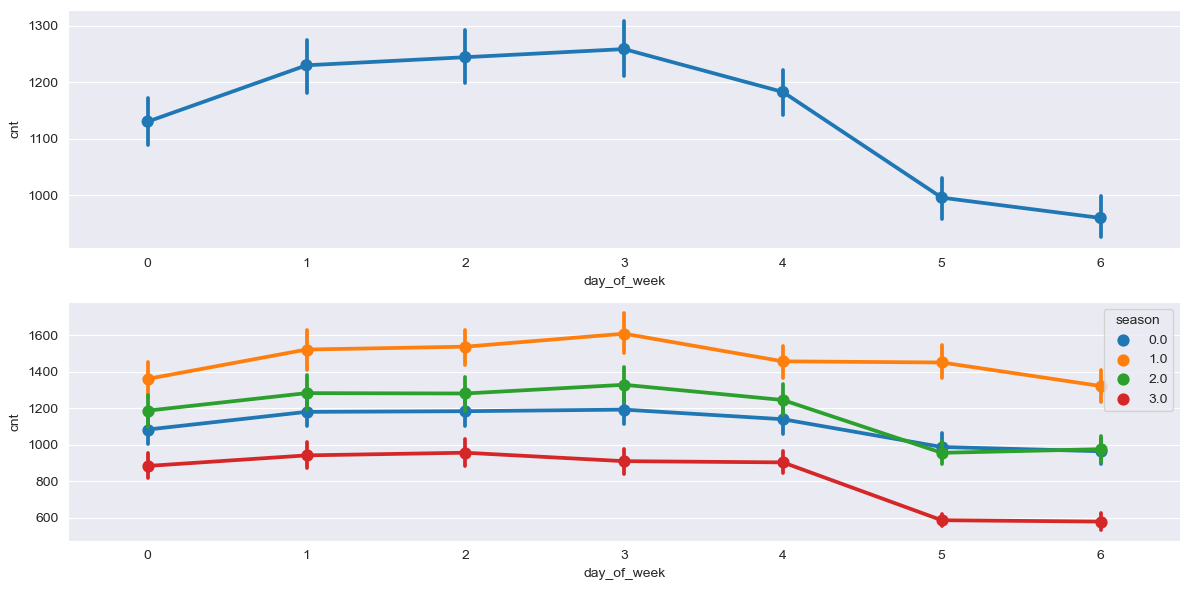

In [61]:
# with pointplot
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(12,6), dpi=100)
sns.pointplot(data=bikes, x="day_of_week", y="cnt", ax=axs[0])
sns.pointplot(data=bikes, x="day_of_week", y="cnt", ax=axs[1], hue="season")
plt.tight_layout()

### 13.Plot bike shares by day of month

In [62]:
#with lineplot

day_of_month = bikes.groupby("day_of_month").mean()[["cnt"]].astype("int")
day_of_month.transpose()

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


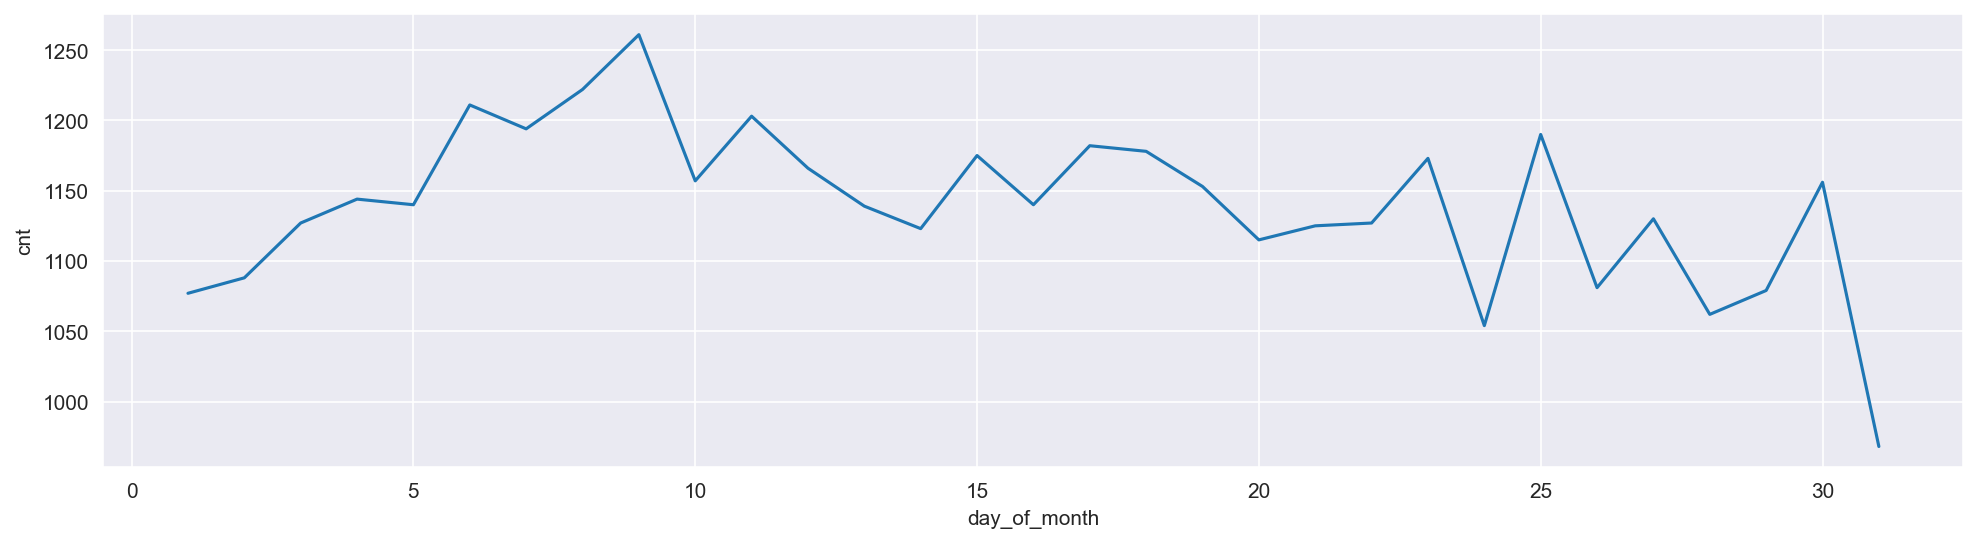

In [63]:
plt.figure(figsize=(16,4), dpi=150)
line = sns.lineplot(data=day_of_month, x=day_of_month.index, y=day_of_month.cnt)

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

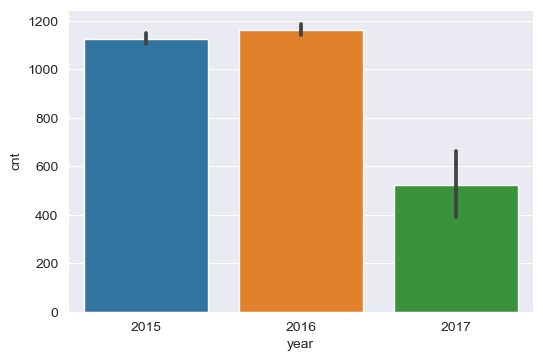

In [64]:
# with barplot

plt.figure(dpi=100)
shares_on_holidays = sns.barplot(x="year", y="cnt", data=bikes)

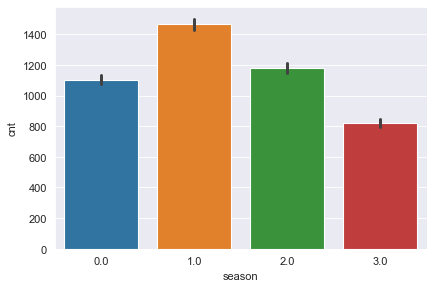

In [65]:
# with barplot

plt.figure(dpi=80)
shares_on_holidays_1 = sns.barplot(x="season", y="cnt", data=bikes)

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [66]:
bikes['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

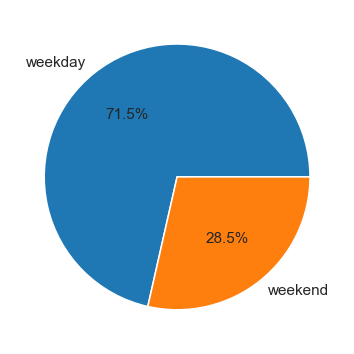

In [67]:
# pie chart

plt.figure(dpi=110)
pie_chart = bikes.is_weekend.value_counts().plot(kind='pie', autopct='%.1f%%', ylabel='', labels=['weekday', 'weekend']) 

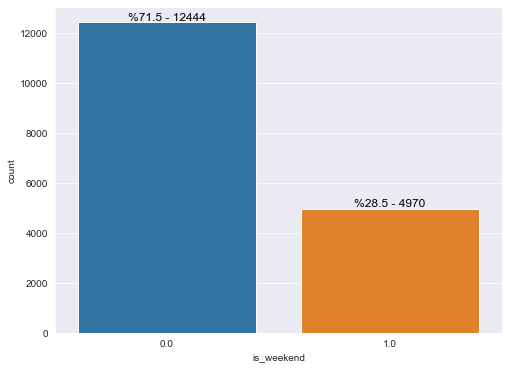

In [69]:
# with countplot

plt.figure(figsize=(8,6))
graph = sns.countplot(x='is_weekend',data = bikes)
for p in graph.patches:
        graph.annotate(f"%{round(p.get_height() / len(bikes.is_weekend) * 100,1)} - {p.get_height()}", (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black',
                      fontsize=12)

### 16.Plot the distribution of weather code by seasons

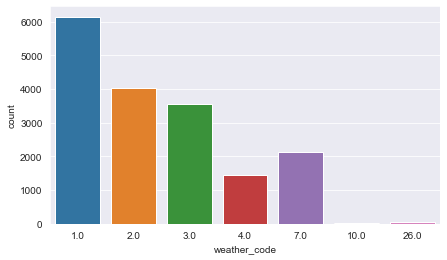

In [74]:
# with countplot

plt.figure(figsize=(7,4))
weather_seasons = sns.countplot(data=bikes, x="weather_code")

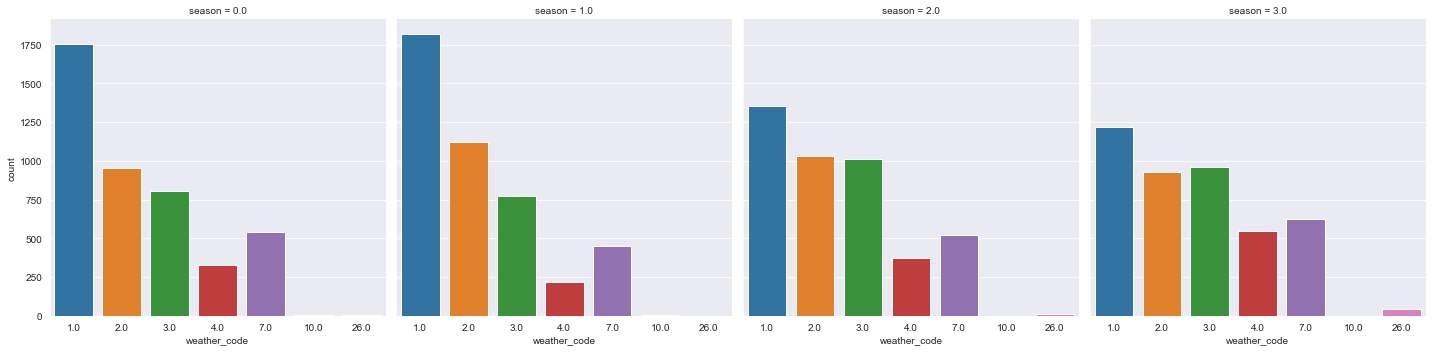

In [75]:
# with catplot

catplot = sns.catplot(data=bikes,x="weather_code", col="season", kind="count")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___